In [15]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

Dataset URL: https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany
License(s): copyright-authors
 96% 89.0M/93.0M [00:03<00:00, 30.5MB/s]
100% 93.0M/93.0M [00:03<00:00, 24.7MB/s]


In [17]:
import zipfile
with zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [20]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = '/content/data/immo_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [21]:
print(data.columns)

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')


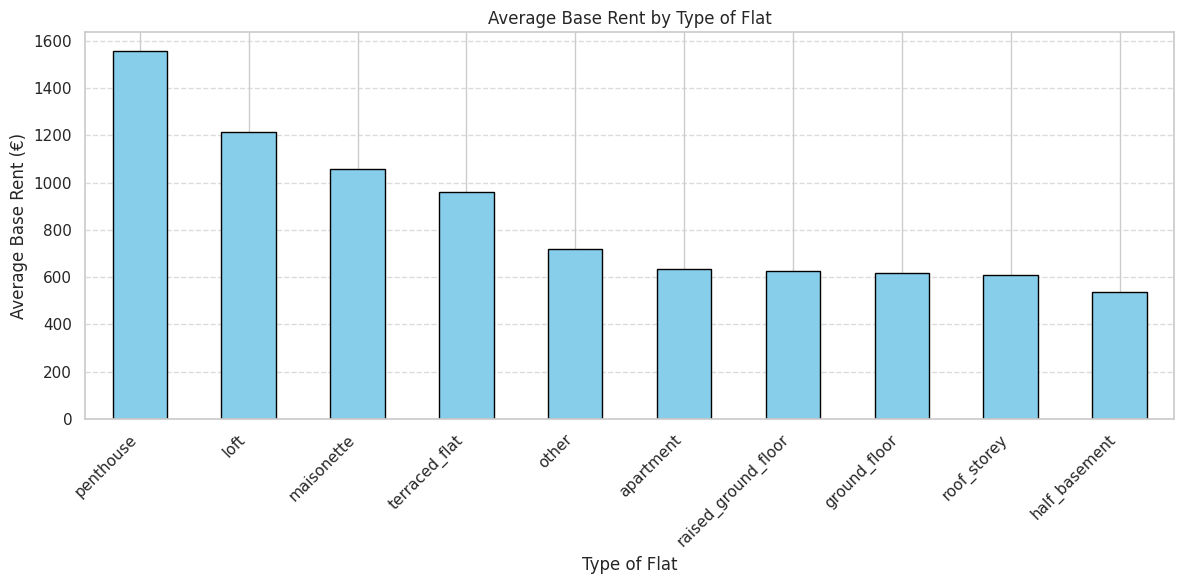

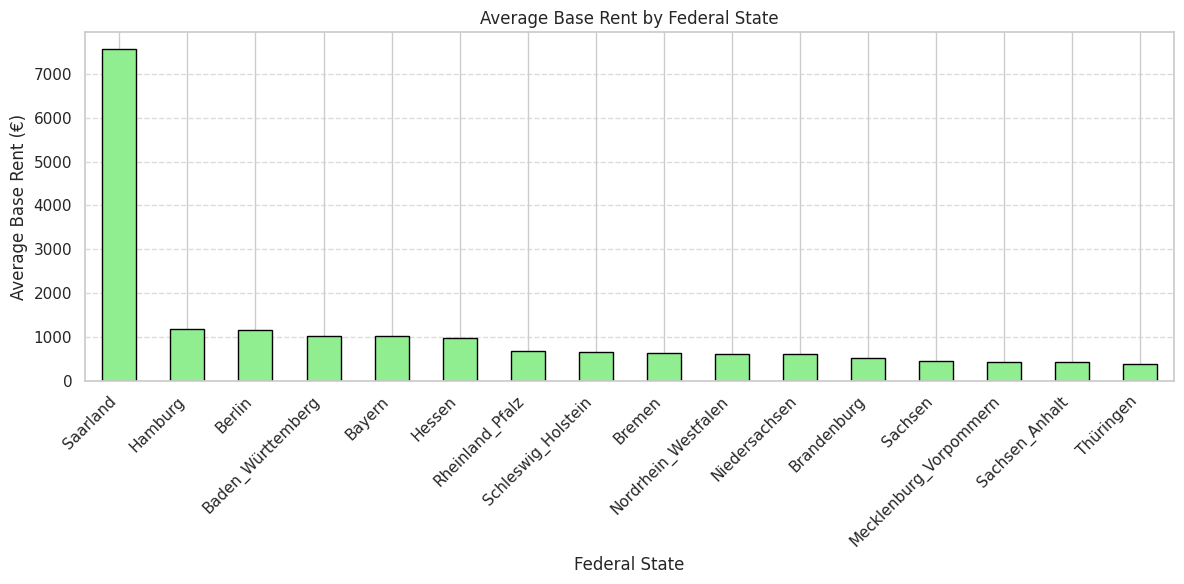

In [25]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate average base rent by type of flat
average_rent_by_type = data.groupby('typeOfFlat')['baseRent'].mean().sort_values(ascending=False)

# Calculate average base rent by federal state
average_rent_by_state = data.groupby('geo_bln')['baseRent'].mean().sort_values(ascending=False)

# Plot average rent by type of flat
plt.figure(figsize=(12, 6))
average_rent_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Base Rent by Type of Flat')
plt.xlabel('Type of Flat')
plt.ylabel('Average Base Rent (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot average rent by federal state
plt.figure(figsize=(12, 6))
average_rent_by_state.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Base Rent by Federal State')
plt.xlabel('Federal State')
plt.ylabel('Average Base Rent (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

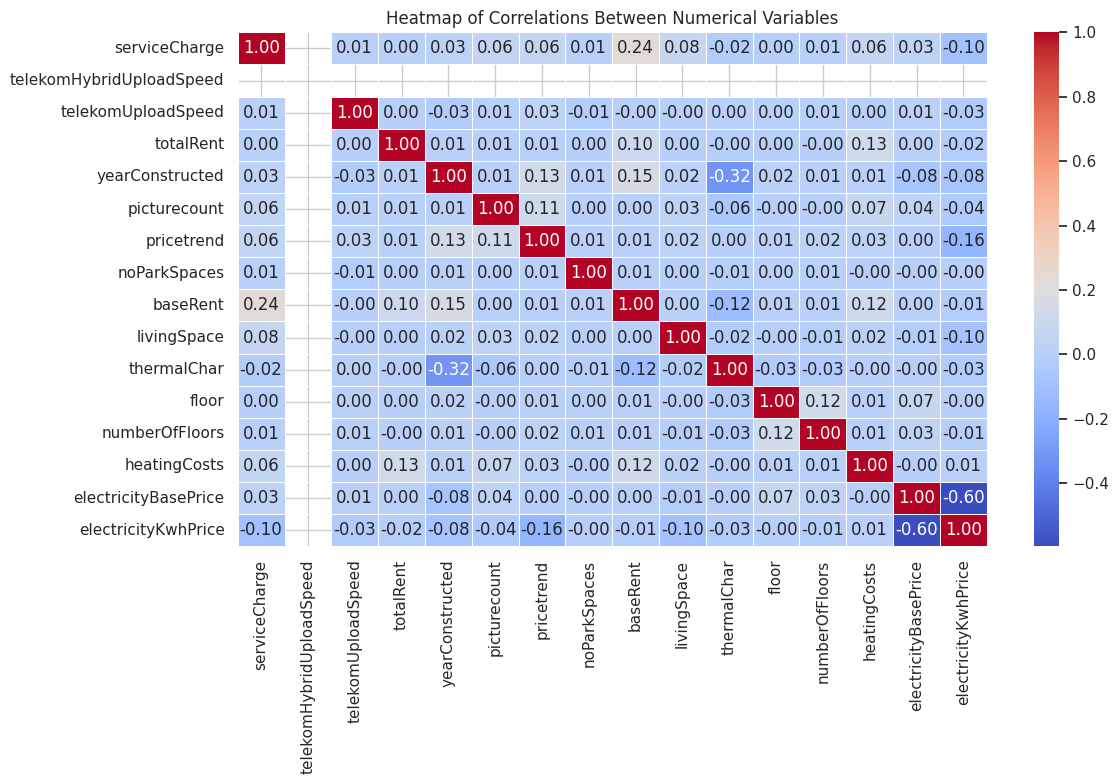

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns based on your dataset structure
numerical_columns = [
    'serviceCharge', 'telekomHybridUploadSpeed', 'telekomUploadSpeed',
    'totalRent', 'yearConstructed', 'picturecount', 'pricetrend',
    'noParkSpaces', 'baseRent', 'livingSpace', 'thermalChar', 'floor',
    'numberOfFloors', 'heatingCosts', 'electricityBasePrice', 'electricityKwhPrice'
]

# Assuming the dataset is named `data`
# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations Between Numerical Variables')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Assuming the dataset is loaded into a DataFrame called `data`

# Select features and target variable
features = [
    'serviceCharge', 'telekomHybridUploadSpeed', 'telekomUploadSpeed',
    'picturecount', 'pricetrend', 'noParkSpaces', 'livingSpace',
    'thermalChar', 'floor', 'numberOfFloors', 'heatingCosts',
    'electricityBasePrice', 'electricityKwhPrice'
]
target = 'baseRent'

# Dropping rows with missing values in selected features or target
cleaned_data = data[features + [target]].dropna()

# Splitting the data into training and testing sets
X = cleaned_data[features]
y = cleaned_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254, 13), (64, 13), (254,), (64,))

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict base rent on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(63110.63033329725, 0.718906351925604)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict base rent on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear

(67539.22530047304, 0.6991814670909398)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict base rent on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree

(85867.72195937499, 0.6175466622670698)

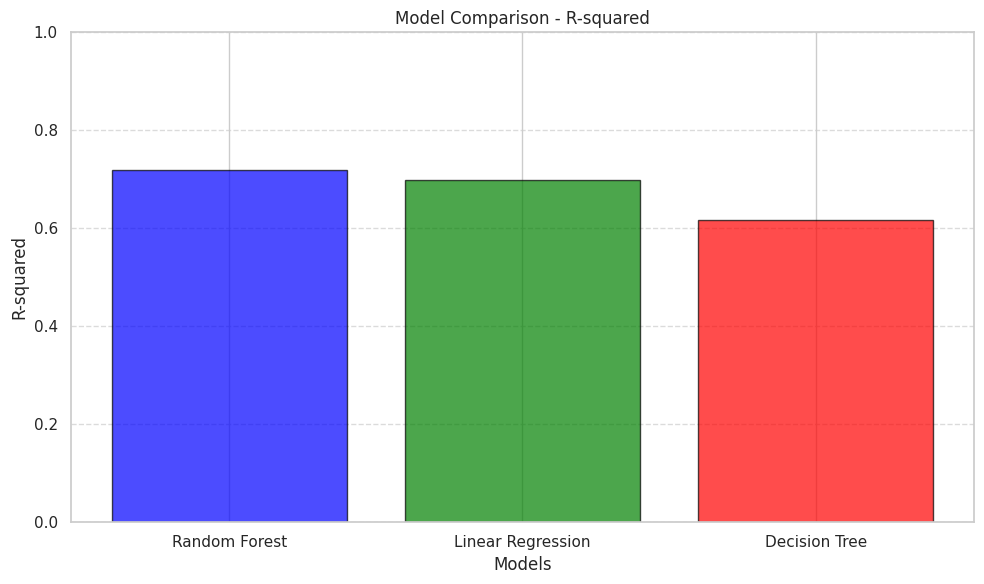

In [35]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Linear Regression', 'Decision Tree']
r2_values = [r2, r2_linear, r2_tree]

# Create a bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red'], alpha=0.7, edgecolor='black')
plt.title('Model Comparison - R-squared')
plt.ylabel('R-squared')
plt.xlabel('Models')
plt.ylim(0, 1)  # R-squared ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


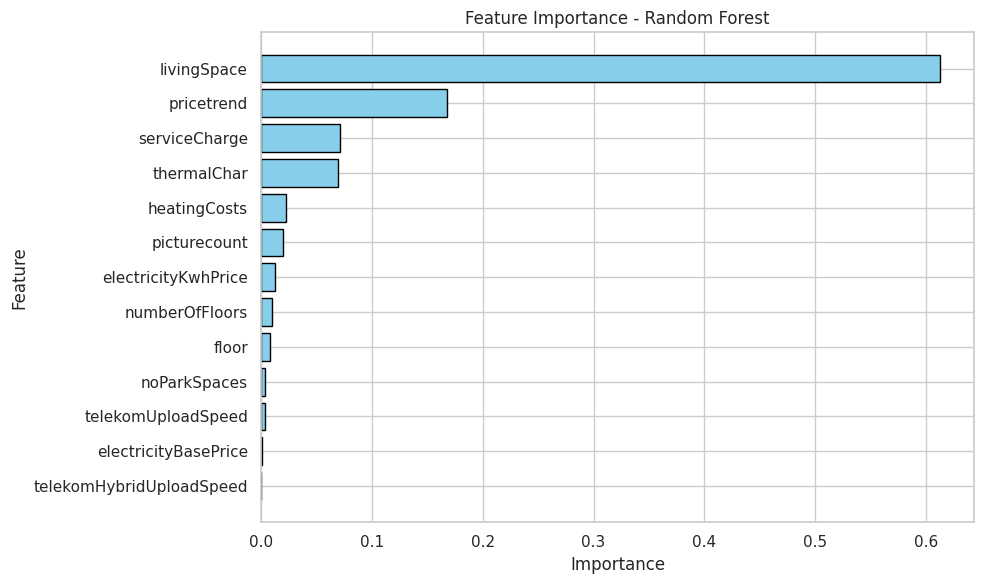

In [36]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data preparation has been completed, and the dataset is loaded into X_train and y_train

# Fit a Random Forest model to compute feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the selected features and target variable
selected_features = ['livingSpaceRange', 'pricetrend', 'serviceCharge', 'thermalChar', 'heatingCosts']
target = 'baseRent'

filtered_data = data[selected_features + [target]].dropna()


X = filtered_data[selected_features]
y = filtered_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Random Forest model using only the selected features
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the new model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 37241.04
R-squared Score: 0.74


In [47]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets for the required parameters
living_space_range_input = widgets.FloatText(description="Living Space Range:", value=75)
pricetrend_input = widgets.FloatText(description="Price Trend:", value=1.2)
service_charge_input = widgets.FloatText(description="Service Charge (€):", value=100)
thermal_char_input = widgets.FloatText(description="Thermal Char:", value=45)
heating_costs_input = widgets.FloatText(description="Heating Costs (€):", value=60)

# Create a button widget
calculate_button = widgets.Button(description="Calculate Base Rent")
output = widgets.Output()

# Define the function to calculate and display the result
def on_calculate_clicked(b):
    with output:
        output.clear_output()  # Clear previous output
        try:
            # Get values from the input widgets
            living_space_range = living_space_range_input.value
            pricetrend = pricetrend_input.value
            service_charge = service_charge_input.value
            thermal_char = thermal_char_input.value
            heating_costs = heating_costs_input.value

            # Predict base rent using the trained model
            predicted_rent = predict_base_rent_calculator(
                living_space_range,
                pricetrend,
                service_charge,
                thermal_char,
                heating_costs
            )
            print(f"Predicted Base Rent: €{predicted_rent:.2f}")
        except Exception as e:
            print(f"Error: {e}")

# Attach the function to the button click event
calculate_button.on_click(on_calculate_clicked)

# Display the input widgets and button
display(living_space_range_input, pricetrend_input, service_charge_input, thermal_char_input, heating_costs_input, calculate_button, output)


FloatText(value=75.0, description='Living Space Range:')

FloatText(value=1.2, description='Price Trend:')

FloatText(value=100.0, description='Service Charge (€):')

FloatText(value=45.0, description='Thermal Char:')

FloatText(value=60.0, description='Heating Costs (€):')

Button(description='Calculate Base Rent', style=ButtonStyle())

Output()